Importa bibliotecas

In [1]:
import graph_tool_extras as gte
import pandas as pd
import csv
from graph_tool import centrality
from math import sqrt
from statistics import mean
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

Importa a base de dados

In [2]:
PATH = './USvideos.csv'


In [3]:
data = pd.read_csv(PATH)

In [4]:
data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
def formata_tag(tag_string):
    # Remove espaços extras e divide pelo separador "|"
    tags = tag_string.strip().split("|")
    
    # Remove aspas extras caso existam
    tags = [tag.strip('"') for tag in tags]
    
    # Retorna as tags no formato desejado
    return tags

In [6]:
dic = {}
with open(PATH) as file:
    reader = csv.reader(file)

    # Ignora a primeira linha, pois ela é o cabeçalho.
    next(reader)

    # Lê o arquivo linha por linha, sem carregá-lo inteiro na memória.
    for line in reader:

        key = line[0] #USA O ID COMO CHAVE

        tags = formata_tag(line[6])
        
        # Neste caso, vamos guardar as informações em dicionário. Lembre que,
        # dependendo do caso, a memória do seu computador pode não aguentar.
        dic[key] = tags

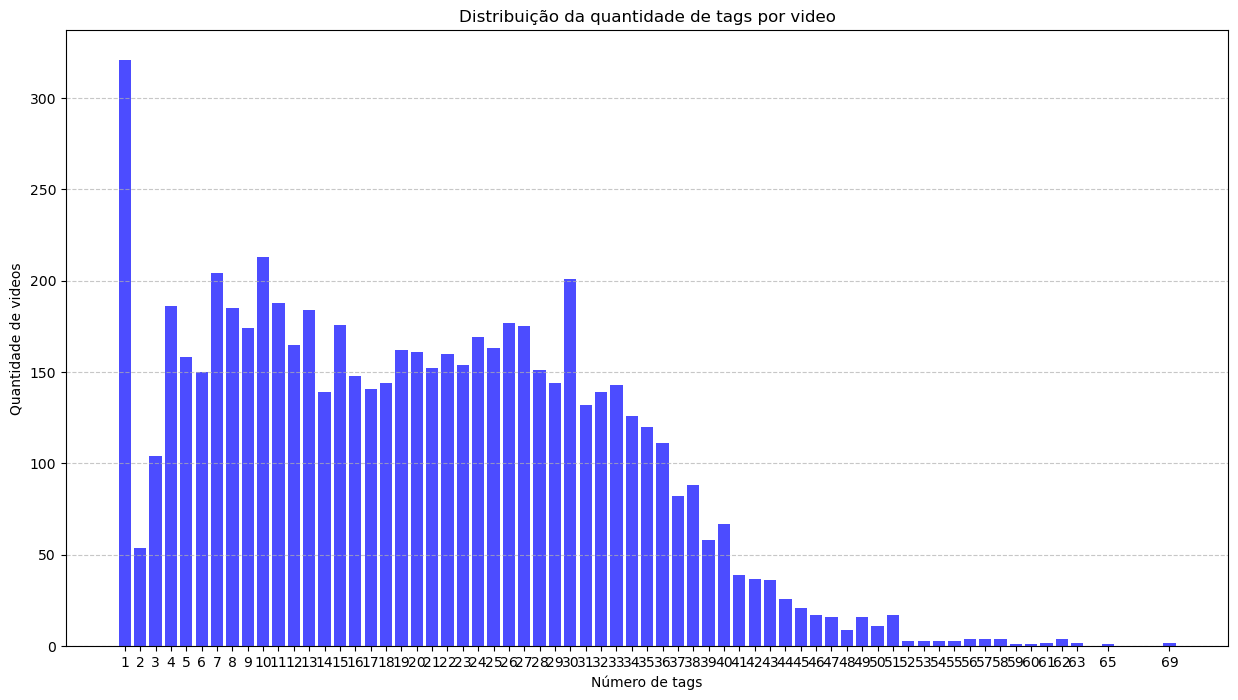

Média da quantidade de tags por vídeo: 19.96000629822075


In [29]:
contador_tag_video = Counter()
for u in dic.keys():
    n = len(dic[u])
    contador_tag_video[n] += 1

x_values = sorted(contador_tag_video.keys())
y_values = [contador_tag_video[x] for x in x_values]

# Criar gráfico
plt.figure(figsize=(15, 8))
plt.bar(x_values, y_values, color='b', alpha=0.7)
plt.xlabel("Número de tags")
plt.ylabel("Quantidade de videos")
plt.title("Distribuição da quantidade de tags por video")
plt.xticks(x_values)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

media_tags_por_video = np.average(x_values, weights=y_values)

print("Média da quantidade de tags por vídeo:", media_tags_por_video)

In [30]:
dic = {k: v for k, v in dic.items() if len(v) > 40}

Adicionando os vértices

In [31]:
# Para esta definição de aresta, não faz sentido ser dirigido.
g = gte.Graph(directed=False)
tags_adicionadas = set()
# As chaves de um dicionário são naturalmente únicas.
# Não precisamos nos preocupar se o id já existe.
vertices = 0
arestas = 0
for u in dic.keys():
    #vertices +=1
    #adiciona os videos como vertices
    #g.add_vertex_by_id(u)
    #adiciona tag como vertice
    for tag in dic[u]:
        if tag not in tags_adicionadas:
            try:
                g.add_vertex_by_id(tag)
                tags_adicionadas.add(tag)  # Marca como adicionado
                vertices += 1
                contador+=1
            except KeyError:
                # Se já existe, apenas continue
                pass  

print(f"Vertices: {vertices}")

Vertices: 7479


Gráfico numero de videos com tags em comum

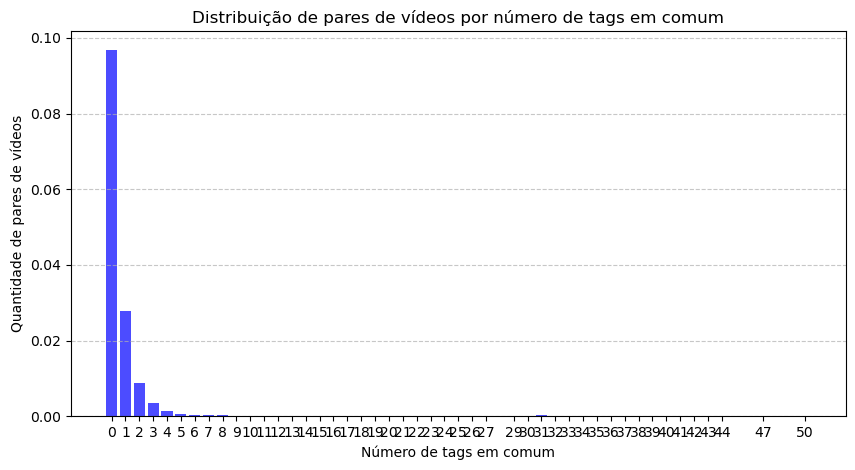

In [32]:
contador_tags = Counter()

# A função combinations é útil para iterar sobre pares
# se a ordem NÃO importa.
def tags_em_comum(tags1, tags2):
    return bool(set(tags1) & set(tags2))  # Retorna True se houver interseção
    
vert_totais = (vertices*vertices -1)/2

for u, v in combinations(dic.keys(), 2):
    common_tags = len(set(dic[u]) & set(dic[v]))  # Número de tags em comum
    # adiciona para fazer a grafico
    contador_tags[common_tags] += 1
    # se possuem tags em comum são ligados por uma aresta
    #if tags_em_comum(dic[u],dic[v]):
     #   g.add_edge_by_ids(u, v)
     #   arestas += 1
        
x_values = sorted(contador_tags.keys())
y_values = [(contador_tags[x]/vert_totais)*100 for x in x_values]

# Criar gráfico
plt.figure(figsize=(10, 5))
plt.bar(x_values, y_values, color='b', alpha=0.7)
plt.xlabel("Número de tags em comum")
plt.ylabel("Quantidade de pares de vídeos")
plt.title("Distribuição de pares de vídeos por número de tags em comum")
plt.xticks(x_values)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



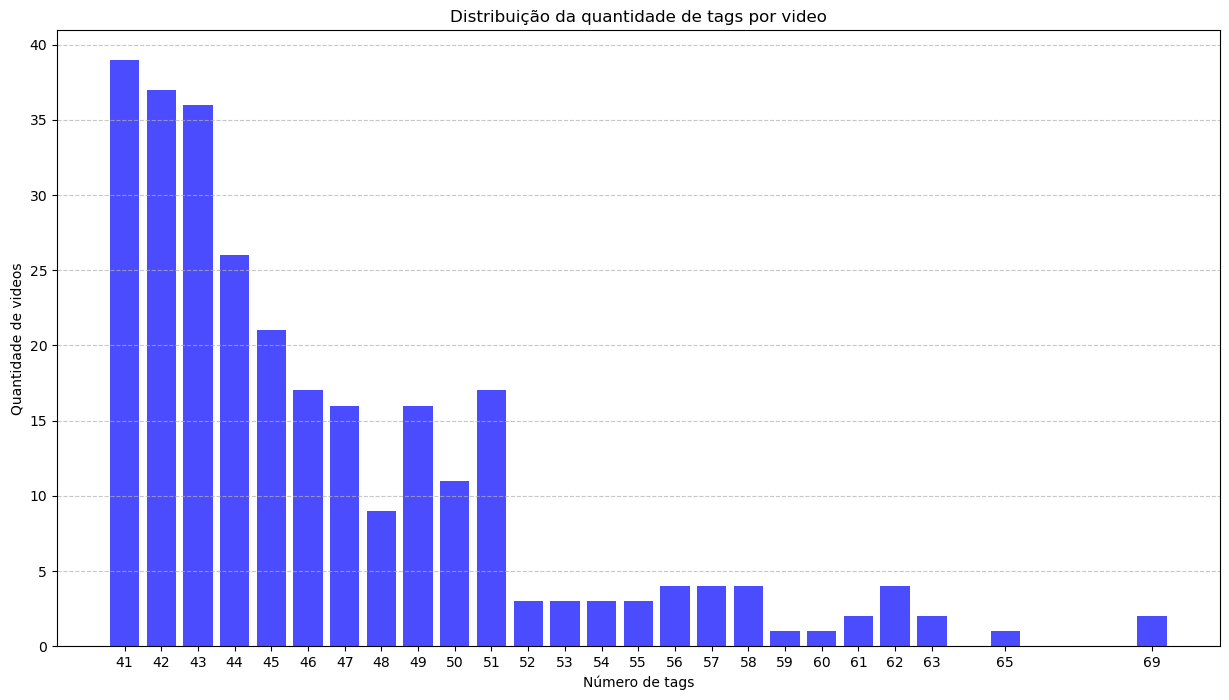

In [33]:
contador_tag_video = Counter()
for u in dic.keys():
    n = len(dic[u])
    contador_tag_video[n] += 1

x_values = sorted(contador_tag_video.keys())
y_values = [contador_tag_video[x] for x in x_values]

# Criar gráfico
plt.figure(figsize=(15, 8))
plt.bar(x_values, y_values, color='b', alpha=0.7)
plt.xlabel("Número de tags")
plt.ylabel("Quantidade de videos")
plt.title("Distribuição da quantidade de tags por video")
plt.xticks(x_values)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


    

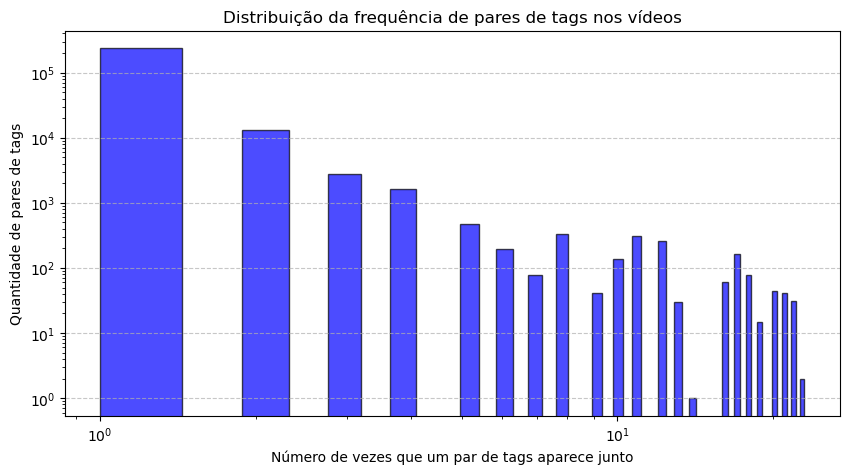

In [34]:
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter

contador_pares = Counter()

# Para cada vídeo, gerar pares de tags e contar as ocorrências
for tags in dic.values():
    for tag1, tag2 in combinations(tags, 2):
        contador_pares[(tag1, tag2)] += 1

# Criar lista de contagens para o histograma
contagens = list(contador_pares.values())

# Criar gráfico de histograma
plt.figure(figsize=(10, 5))
plt.hist(contagens, bins=50, color='b', alpha=0.7, edgecolor="black")
plt.xlabel("Número de vezes que um par de tags aparece junto")
plt.ylabel("Quantidade de pares de tags")
plt.title("Distribuição da frequência de pares de tags nos vídeos")
plt.yscale("log")  # Escala logarítmica para melhor visualização
plt.xscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# caso as tags apareçam juntas em mais de 60 videos, são ligadas
for (tag1, tag2), count in contador_pares.items():
    if count > 10:
        g.add_edge_by_ids(tag1, tag2)
        arestas+=1
            

In [35]:
print(f"Arestas {arestas}")

Arestas 1042


In [37]:
from graph_tool import draw
layout = draw.sfdp_layout(g)
# fazer clear
gte.move(g, layout)
g = gte.clean(g)
gte.save(g, 'two_mode_so_tags.net.gz')

In [40]:
#adicionando os videos como vertices
for u in dic.keys():
    g.add_vertex_by_id(u)
    for tag in dic[u]:
        # liga video com a tag se ele possuir ela
        try:
            g.add_edge_by_ids(u, tag)
            arestas +=1
        except KeyError:
                # Se já existe, apenas continue
            pass  

layout = draw.sfdp_layout(g)
# fazer clear
gte.move(g, layout)
g = gte.clean(g)
gte.save(g, 'hibrida.net.gz')
print(arestas)

1754


REDE TWO MODE

In [8]:
import netpixi
r = netpixi.render('two_mode_so_tags.net.gz', infinite=True);

# Degree sobre a two-mode original

In [7]:
import netpixi
g = gte.load('./two_mode_so_tags.net.gz')
c = gte.total_degree(g)

g.add_vp('degree', c)

gte.save(g, 'degree.net.gz')

r_d = netpixi.render('degree.net.gz')

In [8]:
r_d.vertex_scale('degree', 10, 30)

# Closeness sobre a two-mode original

In [33]:
import netpixi
g = gte.load('./two_mode_so_tags.net.gz')
c = centrality.closeness(g, harmonic=True)

g.add_vp('closeness', c)

gte.save(g, 'closeness.net.gz')

r_c = netpixi.render('closeness.net.gz')



In [12]:
r_c.vertex_scale('closeness', 10, 30)

In [14]:
top_5 = sorted(g.vertices(), key=lambda v: c[v], reverse=True)[:5]

# Exibir os resultados
print("Top 5 tags mais centrais (closeness):")
for v in top_5:
    print(f"{v['name']}: {c[v]}")

Top 5 tags mais centrais (closeness):
5: 0.9087301587301587

27: 0.9087301587301587

6: 0.8968253968253967

8: 0.8968253968253967

9: 0.8968253968253967



# Betweennes sobre a two-mode original

In [19]:
import netpixi
g = gte.load('./two_mode_so_tags.net.gz')
c, _ = centrality.betweenness(g)

g.add_vp('betweenness', c)

gte.save(g, 'betweenness.net.gz')

r_b = netpixi.render('betweenness.net.gz')



In [14]:
r_b.vertex_scale('betweenness', 10, 30)

In [20]:
top_5 = sorted(g.vertices(), key=lambda v: c[v], reverse=True)[:5]

# Exibir os resultados
print("Top 5 tags (betweennes):")
for v in top_5:
    print(f"{v}: {c[v]}")


Top 5 tags (betweennes):
41: 0.25101626016260165
1: 0.22531939605110338
5: 0.028979680623370963
27: 0.028979680623370963
6: 0.005750876906762378


In [22]:
    print(list(g.vp.keys()))

['id', '_x', '_y', 'betweenness']


# Degree sobre a hibrida

In [7]:
import netpixi
g = gte.load('./hibrida.net.gz')
c = gte.total_degree(g)

g.add_vp('degree', c)

gte.save(g, 'degree_hibrida.net.gz')

r_hd = netpixi.render('degree_hibrida.net.gz')

In [14]:
r_hd.vertex_scale('degree', 10, 30)

In [15]:
top_5 = sorted(g.vertices(), key=lambda v: c[v], reverse=True)[:5]

# Exibir os resultados
print("Top 5 tags (degree):")
for v in top_5:
    print(f"{v}: {c[v]}")

Top 5 tags (degree):
49: 1.0
50: 1.0
52: 1.0
54: 1.0
57: 1.0


# Restrição sobre a rede hibrida

In [9]:
import netpixi
g = gte.load('./hibrida.net.gz')

c = gte.burt_constraint(g)

g.add_vp('burt_constraint', c)

gte.save(g, 'structural_holes.net.gz')

r_s = netpixi.render('structural_holes.net.gz')

In [11]:
r_s.vertex_scale('burt_constraint', 10, 30)

In [13]:
top_5 = sorted(g.vertices(), key=lambda v: c[v], reverse=True)[:5]

# Exibir os resultados
print("Top 5 tags (restrição):")
for v in top_5:
    print(f"{v}: {c[v]}")

Top 5 tags (restrição):
49: 1.0
50: 1.0
52: 1.0
54: 1.0
57: 1.0
